In [1]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager 
import matplotlib.pyplot as plt


In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - About to download new driver from https://chromedriver.storage.googleapis.com/103.0.5060.53/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\varun\.wdm\drivers\chromedriver\win32\103.0.5060.53]
C:\Users\varun\AppData\Local\Temp\ipykernel_5220\1503906442.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [3]:
page_url = 'https://riordan.fandom.com/wiki/Category:Percy_Jackson_and_the_Olympians_characters'
driver.get(page_url)

In [4]:
book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [5]:
for i in range(0, len(book_categories)):
    print(book_categories[i].text)

Category:The Lightning Thief characters
Category:The Sea of Monsters characters
Category:The Titan's Curse characters
Category:The Battle of the Labyrinth characters
Category:The Last Olympian characters
Category:Animals
Category:Characters
Category:Heroes (CHB)
Category:Historic Demigods (CHB)
Category:P.O.V. Characters
Category:The Demigod Files characters
Category:Virgin Goddesses (Greek)


In [6]:
#we only need the first 5 categories.

del book_categories[-7:]

for i in range(0, len(book_categories)):
    print(book_categories[i].text)

Category:The Lightning Thief characters
Category:The Sea of Monsters characters
Category:The Titan's Curse characters
Category:The Battle of the Labyrinth characters
Category:The Last Olympian characters


In [7]:
#let us get the characters from the first book

book_categories[0].get_attribute('href')

'https://riordan.fandom.com/wiki/Category:The_Lightning_Thief_characters'

In [8]:
driver.get(book_categories[0].get_attribute('href'))

In [9]:
character_elements = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [10]:
character_elements[0].text

'Alecto'

We now know how to get to a book and how to get the characters in each book. Let us do it for all five books.

In [11]:
driver = webdriver.Chrome(ChromeDriverManager().install())

page_url = 'https://riordan.fandom.com/wiki/Category:Percy_Jackson_and_the_Olympians_characters'
driver.get(page_url)

book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

del book_categories[-7:]

books=[]

for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name' : book_name, 'url' : book_url})

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\varun\.wdm\drivers\chromedriver\win32\103.0.5060.53\chromedriver.exe] found in cache
C:\Users\varun\AppData\Local\Temp\ipykernel_5220\2832226880.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [12]:
books

[{'book_name': 'Category:The Lightning Thief characters',
  'url': 'https://riordan.fandom.com/wiki/Category:The_Lightning_Thief_characters'},
 {'book_name': 'Category:The Sea of Monsters characters',
  'url': 'https://riordan.fandom.com/wiki/Category:The_Sea_of_Monsters_characters'},
 {'book_name': "Category:The Titan's Curse characters",
  'url': 'https://riordan.fandom.com/wiki/Category:The_Titan%27s_Curse_characters'},
 {'book_name': 'Category:The Battle of the Labyrinth characters',
  'url': 'https://riordan.fandom.com/wiki/Category:The_Battle_of_the_Labyrinth_characters'},
 {'book_name': 'Category:The Last Olympian characters',
  'url': 'https://riordan.fandom.com/wiki/Category:The_Last_Olympian_characters'}]

In [13]:
characters = []

for book in books:
    
    driver.get(book['url'])
    character_elements = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')
    
    for element in character_elements:
        characters.append({'book' : book['book_name'], 'character' : element.text})

In [14]:
character_df = pd.DataFrame(characters)
character_df

,book,character
0,Category:The Lightning Thief characters,Alecto
1,Category:The Lightning Thief characters,Annabeth Chase
2,Category:The Lightning Thief characters,Ares
3,Category:The Lightning Thief characters,Argus
4,Category:The Lightning Thief characters,Barbara Walters
...,...,...
432,Category:The Last Olympian characters,Triton
433,Category:The Last Olympian characters,Typhon
434,Category:The Last Olympian characters,Tyson
435,Category:The Last Olympian characters,William H. Seward's Statue


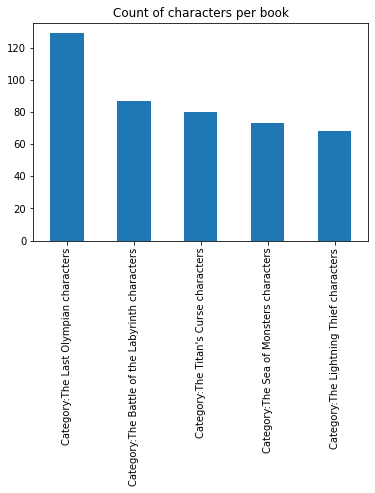

In [15]:
character_df['book'].value_counts().plot(kind='bar')
plt.title('Count of characters per book')
plt.show()

Here we see that the maximum number of characters are present in the later books.

In [16]:
character_df.to_csv('Books/characters.csv')